In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import warnings
import sys
import metpy
import metpy.units
import matplotlib
import matplotlib.gridspec as gridspec
import geopandas
import metpy.calc as mpcalc
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import pandas as pd
from netCDF4 import Dataset
import os
import glob
import datetime as dt
import seaborn as sns

/jobfs/88527132.gadi-pbs/ipykernel_330901/4171146888.py:11: DeprecationWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas still uses PyGEOS by default. However, starting with version 0.14, the default will switch to Shapely. To force to use Shapely 2.0 now, you can either uninstall PyGEOS or set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In the next release, GeoPandas will switch to using Shapely by default, even if PyGEOS is installed. If you only have PyGEOS installed to get speed-ups, this switch should be smooth. However, if you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shapely.readthedocs.io/en/latest/migration_pygeos.html).
  import geopandas


In [2]:
warnings.filterwarnings('ignore')
%matplotlib inline

# Open BARRA-2 files

In [3]:
#variable = "av_wnd_ucmp_uv"
def file_name(variable0):
    variable = variable0
    files = [
    "/g/data/v46/yvh565/barra2/yhuang/20220208T0000Z/"+variable+"-barra_r2-hres-202202080300-202202080900.nc",
    "/g/data/v46/yvh565/barra2/yhuang/20220208T0600Z/"+variable+"-barra_r2-hres-202202080900-202202081500.nc",
    "/g/data/v46/yvh565/barra2/yhuang/20220208T1200Z/"+variable+"-barra_r2-hres-202202081500-202202082100.nc",
    "/g/data/v46/yvh565/barra2/yhuang/20220208T1800Z/"+variable+"-barra_r2-hres-202202082100-202202090300.nc",
    "/g/data/v46/yvh565/barra2/yhuang/20220209T0000Z/"+variable+"-barra_r2-hres-202202090300-202202090900.nc",
    "/g/data/v46/yvh565/barra2/yhuang/20220209T0600Z/"+variable+"-barra_r2-hres-202202090900-202202091500.nc",
    "/g/data/v46/yvh565/barra2/yhuang/20220209T1200Z/"+variable+"-barra_r2-hres-202202091500-202202092100.nc",
    "/g/data/v46/yvh565/barra2/yhuang/20220209T1800Z/"+variable+"-barra_r2-hres-202202092100-202202100300.nc",
    "/g/data/v46/yvh565/barra2/yhuang/20220210T0000Z/"+variable+"-barra_r2-hres-202202100300-202202100900.nc",
    "/g/data/v46/yvh565/barra2/yhuang/20220210T0600Z/"+variable+"-barra_r2-hres-202202100900-202202101500.nc",
    "/g/data/v46/yvh565/barra2/yhuang/20220210T1200Z/"+variable+"-barra_r2-hres-202202101500-202202102100.nc",
    "/g/data/v46/yvh565/barra2/yhuang/20220210T1800Z/"+variable+"-barra_r2-hres-202202102100-202202110300.nc",
    "/g/data/v46/yvh565/barra2/yhuang/20220211T0000Z/"+variable+"-barra_r2-hres-202202110300-202202110900.nc",
    "/g/data/v46/yvh565/barra2/yhuang/20220211T0600Z/"+variable+"-barra_r2-hres-202202110900-202202111500.nc",
    "/g/data/v46/yvh565/barra2/yhuang/20220211T1200Z/"+variable+"-barra_r2-hres-202202111500-202202112100.nc",
    "/g/data/v46/yvh565/barra2/yhuang/20220211T1800Z/"+variable+"-barra_r2-hres-202202112100-202202120300.nc",
    "/g/data/v46/yvh565/barra2/yhuang/20220212T0000Z/"+variable+"-barra_r2-hres-202202120300-202202120900.nc",
    "/g/data/v46/yvh565/barra2/yhuang/20220212T0600Z/"+variable+"-barra_r2-hres-202202120900-202202121500.nc",
    "/g/data/v46/yvh565/barra2/yhuang/20220212T1200Z/"+variable+"-barra_r2-hres-202202121500-202202122100.nc",
    "/g/data/v46/yvh565/barra2/yhuang/20220212T1800Z/"+variable+"-barra_r2-hres-202202122100-202202130300.nc",
    "/g/data/v46/yvh565/barra2/yhuang/20220213T0000Z/"+variable+"-barra_r2-hres-202202130300-202202130900.nc",
    "/g/data/v46/yvh565/barra2/yhuang/20220213T0600Z/"+variable+"-barra_r2-hres-202202130900-202202131500.nc",
    "/g/data/v46/yvh565/barra2/yhuang/20220213T1200Z/"+variable+"-barra_r2-hres-202202131500-202202132100.nc",
    "/g/data/v46/yvh565/barra2/yhuang/20220213T1800Z/"+variable+"-barra_r2-hres-202202132100-202202140300.nc",
    "/g/data/v46/yvh565/barra2/yhuang/20220214T0000Z/"+variable+"-barra_r2-hres-202202140300-202202140900.nc",
    "/g/data/v46/yvh565/barra2/yhuang/20220214T0600Z/"+variable+"-barra_r2-hres-202202140900-202202141500.nc",
    "/g/data/v46/yvh565/barra2/yhuang/20220214T1200Z/"+variable+"-barra_r2-hres-202202141500-202202142100.nc",
    "/g/data/v46/yvh565/barra2/yhuang/20220214T1800Z/"+variable+"-barra_r2-hres-202202142100-202202150300.nc",
    "/g/data/v46/yvh565/barra2/yhuang/20220215T0000Z/"+variable+"-barra_r2-hres-202202150300-202202150900.nc",
    "/g/data/v46/yvh565/barra2/yhuang/20220215T0600Z/"+variable+"-barra_r2-hres-202202150900-202202151500.nc",
    "/g/data/v46/yvh565/barra2/yhuang/20220215T1200Z/"+variable+"-barra_r2-hres-202202151500-202202152100.nc",
    "/g/data/v46/yvh565/barra2/yhuang/20220215T1800Z/"+variable+"-barra_r2-hres-202202152100-202202160300.nc"]
    return xr.open_mfdataset(files, engine="netcdf4")

# Wind Roses

In [4]:
barra2_ds_u = file_name("av_wnd_ucmp_uv")

In [5]:
barra2_ds_v = file_name("av_wnd_vcmp_uv")

In [7]:
from metpy.units import units
start_time = '2022-02-08T04:30:00.000000000'
end_time = '2022-02-16T01:30:00.000000000'
timeslice= slice (0,20)
time_slice = slice(start_time, end_time)

In [16]:
#ws_wd(362,540,850) # Townsville
#ws_wd(386,532,850) # Cairns
#ws_wd(391,570,850) # Willis Island
u_data = barra2_ds_u.isel(latitude=362,longitude=540,bnds=1).sel(pressure=1000,time=time_slice) 
uu = u_data.av_wnd_ucmp_uv * units("m/s")

In [17]:
v_data = barra2_ds_v.isel(latitude=362,longitude=540,bnds=1).sel(pressure=1000,time=time_slice)
vv = v_data.av_wnd_vcmp_uv * units("m/s")

In [18]:
wind_dir = metpy.calc.wind_direction(uu, vv, convention='from')

In [19]:
wind_speed = metpy.calc.wind_speed(uu, vv)

In [20]:
direction = wind_dir.values
speed = wind_speed.values

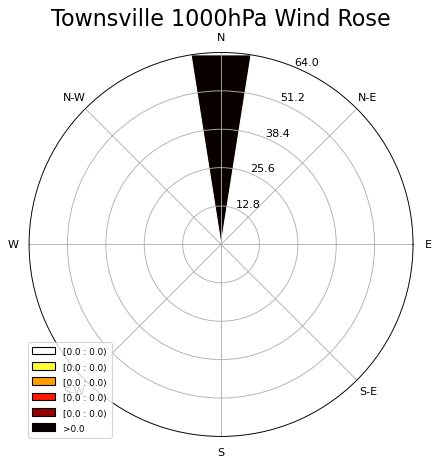

In [21]:
import windrose
from windrose import WindroseAxes
import matplotlib.cm as cm

orig_map = plt.cm.get_cmap('hot')
rev_map = orig_map.reversed()
ax = WindroseAxes.from_ax(figsize=(6,15))
ax.bar(direction, speed, opening=0.8, edgecolor='white', cmap=rev_map)
ax.set_title("Townsville 1000hPa Wind Rose",fontsize=20)
ax.set_legend()

* plot all windroses like above bar graph form
* precip roses replace wind speed with rain rate, plot on same graph or next to
* plot u and v values on line graph to check that the quadrants make sense
* do windroses for 1000, 500, 200 hPa

# Plot u and v lines

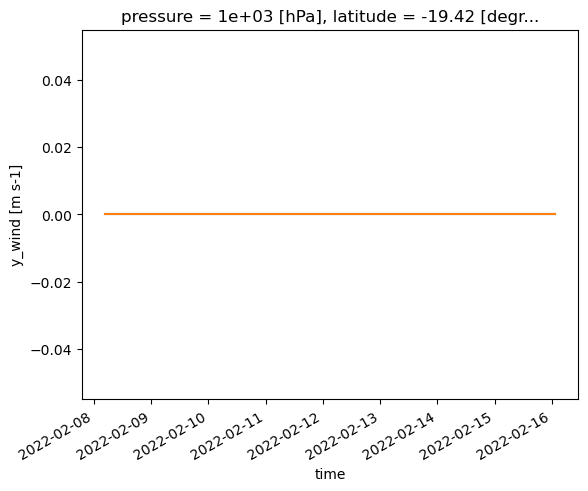

In [22]:
#ws_wd(362,540,850) # Townsville
#ws_wd(386,532,850) # Cairns
#ws_wd(391,570,850) # Willis Island
barra2_ds_u.isel(latitude=362,longitude=540,bnds=1).sel(pressure=1000,time=time_slice).av_wnd_ucmp_uv.plot()
barra2_ds_v.isel(latitude=362,longitude=540,bnds=1).sel(pressure=1000,time=time_slice).av_wnd_vcmp_uv.plot()

# Precipitation Roses

#### Open Radar files

In [14]:
files_T = ["/g/data/rq0/level_2/73/RAINRATE/73_20220208_rainrate.nc",
           "/g/data/rq0/level_2/73/RAINRATE/73_20220209_rainrate.nc",
           "/g/data/rq0/level_2/73/RAINRATE/73_20220210_rainrate.nc",
           "/g/data/rq0/level_2/73/RAINRATE/73_20220211_rainrate.nc",
           "/g/data/rq0/level_2/73/RAINRATE/73_20220212_rainrate.nc",
           "/g/data/rq0/level_2/73/RAINRATE/73_20220213_rainrate.nc",
           "/g/data/rq0/level_2/73/RAINRATE/73_20220214_rainrate.nc",
           "/g/data/rq0/level_2/73/RAINRATE/73_20220215_rainrate.nc"]
#print('files Townsville: ',files_T)

files_C = ["/g/data/rq0/level_2/19/RAINRATE/19_20220208_rainrate.nc",
           "/g/data/rq0/level_2/19/RAINRATE/19_20220209_rainrate.nc",
           "/g/data/rq0/level_2/19/RAINRATE/19_20220210_rainrate.nc",
           "/g/data/rq0/level_2/19/RAINRATE/19_20220211_rainrate.nc",
           "/g/data/rq0/level_2/19/RAINRATE/19_20220212_rainrate.nc",
           "/g/data/rq0/level_2/19/RAINRATE/19_20220213_rainrate.nc",
           "/g/data/rq0/level_2/19/RAINRATE/19_20220214_rainrate.nc",
           "/g/data/rq0/level_2/19/RAINRATE/19_20220215_rainrate.nc"]
#print('files Cairns: ',files_C)

files_W = ["/g/data/rq0/level_2/41/RAINRATE/41_20220208_rainrate.nc",
           "/g/data/rq0/level_2/41/RAINRATE/41_20220209_rainrate.nc",
           "/g/data/rq0/level_2/41/RAINRATE/41_20220210_rainrate.nc",
           "/g/data/rq0/level_2/41/RAINRATE/41_20220211_rainrate.nc",
           "/g/data/rq0/level_2/41/RAINRATE/41_20220212_rainrate.nc",
           "/g/data/rq0/level_2/41/RAINRATE/41_20220213_rainrate.nc",
           "/g/data/rq0/level_2/41/RAINRATE/41_20220214_rainrate.nc",
           "/g/data/rq0/level_2/41/RAINRATE/41_20220215_rainrate.nc"]
#print('files Willis Island: ',files_W)

# open datasets
ds_Trr = xr.open_mfdataset(files_T, engine="netcdf4")
ds_Crr = xr.open_mfdataset(files_C, engine="netcdf4")
ds_Wrr = xr.open_mfdataset(files_W, engine="netcdf4")

In [15]:
barra2_ds_u = file_name("av_wnd_ucmp_uv")
barra2_ds_v = file_name("av_wnd_vcmp_uv")
from metpy.units import units
start_time = '2022-02-08T04:30:00.000000000'
end_time = '2022-02-16T01:30:00.000000000'
time_slice = slice(start_time, end_time)

start_time_radar = '2022-02-08T00:00:00.000000000'
end_time_radar = '2022-02-15T23:55:00.000000000'
time_slice_radar = slice(start_time_radar, end_time_radar)

#ws_wd(362,540,850) # Townsville
#ws_wd(386,532,850) # Cairns
#ws_wd(391,570,850) # Willis Island
u_data = barra2_ds_u.isel(latitude=362,longitude=540,bnds=1).sel(pressure=850,time=time_slice) 
uu = u_data.av_wnd_ucmp_uv * units("m/s")
v_data = barra2_ds_v.isel(latitude=362,longitude=540,bnds=1).sel(pressure=850,time=time_slice)
vv = v_data.av_wnd_vcmp_uv * units("m/s")

In [ ]:
wind_dir = metpy.calc.wind_direction(uu, vv, convention='from')

In [24]:
# replace wind speed with rain rate
rain_rate = ds_Trr.rainrate.sel(x=0,y=0,time=time_slice)
rain_rate
len(direction)
rr = []

64

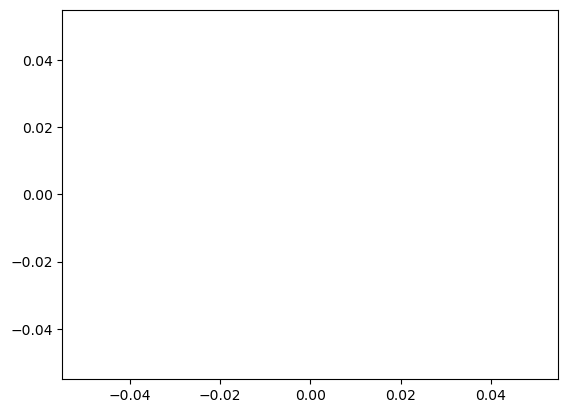

In [29]:
plt.plot(rain_rate)

In [22]:
direction = wind_dir.values
# replace speed with rain rate
rainrate = rain_rate.values

ValueError: var and direction must have same length

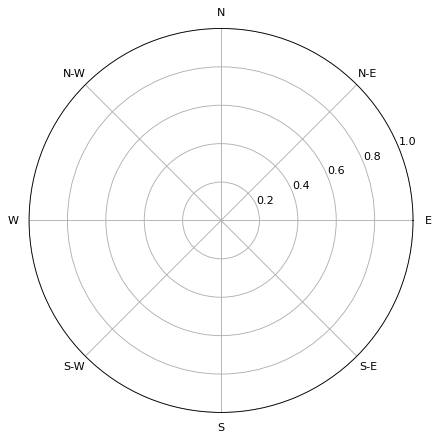

In [23]:
import windrose
from windrose import WindroseAxes
import matplotlib.cm as cm

orig_map = plt.cm.get_cmap('hot')
rev_map = orig_map.reversed()
ax = WindroseAxes.from_ax(figsize=(6,15))
ax.bar(direction, rainrate, opening=0.8, edgecolor='white', cmap=rev_map)
ax.set_title("Townsville 850 Precipitation Rose",fontsize=20)
ax.set_legend()

# Precip histogram analyses

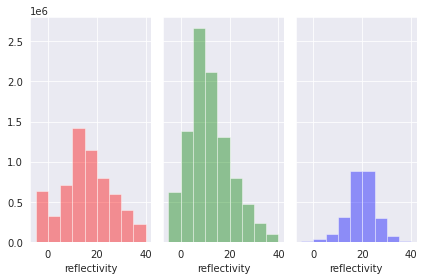

In [12]:
fig, ax = plt.subplots(1, 3, sharey=True, tight_layout=True)
sns.set_style("darkgrid")
bins = [-5,0,5,10,15,20,25,30,35,40]
sns.distplot(ds_T.reflectivity,bins=bins,hist=True,kde=False,norm_hist=False,ax=ax[0],color="red")
sns.distplot(ds_C.reflectivity,bins=bins,hist=True,kde=False,norm_hist=False,ax=ax[1],color="green")
sns.distplot(ds_W.reflectivity,bins=bins,hist=True,kde=False,norm_hist=False,ax=ax[2],color="blue");

# January 2022 Precip analysis

<AxesSubplot:title={'center':'21:00 - 23:55'}>

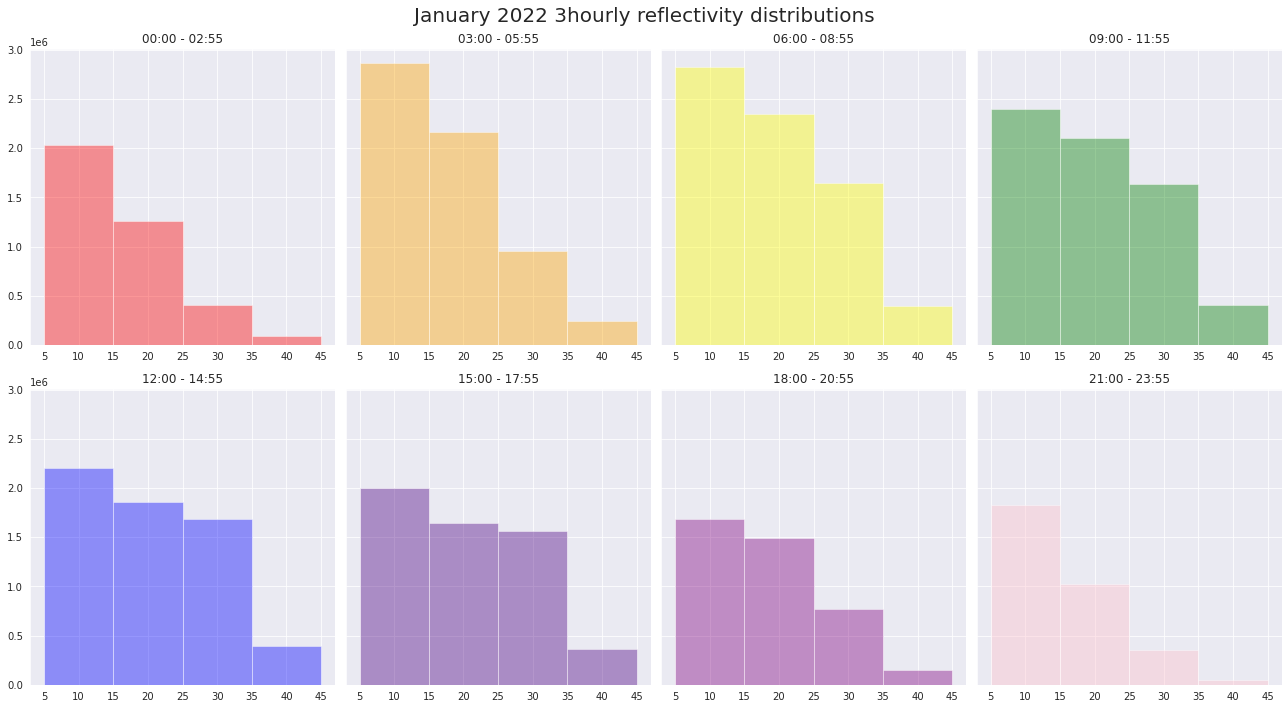

In [22]:
dir = "/g/data/rq0/level_2/73/REFLECTIVITY/73_"
time01_00 = []
time01_03 = []    
time01_06 = []    
time01_09 = []    
time01_12 = []    
time01_15 = []    
time01_18 = []    
time01_21 = []    
for i in ["202201"]:
    files_T_202201 = glob.glob(dir+"*%s*"%(i))
    files_T_202201.sort
    ds_T = xr.open_mfdataset(files_T_202201, engine="netcdf4")
    for l in ["01","02","03","04","05","06","07","08","09","10",
              "11","12","13","14","15","16","17","18","19","20",
              "21","22","23","24","25","26","27","28","29","30","31"]:
        start00 = "2022-01-"+l+"T00:00:00.000000000"
        end00 = "2022-01-"+l+"T02:55:00.000000000"
        time_slice00 = slice(start00,end00)
        T00 = ds_T["reflectivity"].sel(time=time_slice00)
        time01_00.append(T00)
        
        start03 = "2022-01-"+l+"T03:00:00.000000000"
        end03 = "2022-01-"+l+"T05:55:00.000000000"
        time_slice03 = slice(start03,end03)
        T03 = ds_T["reflectivity"].sel(time=time_slice03)
        time01_03.append(T03)
        
        start06 = "2022-01-"+l+"T06:00:00.000000000"
        end06 = "2022-01-"+l+"T08:55:00.000000000"
        time_slice06 = slice(start06,end06)
        T06 = ds_T["reflectivity"].sel(time=time_slice06)
        time01_06.append(T06)
        
        start09 = "2022-01-"+l+"T09:00:00.000000000"
        end09 = "2022-01-"+l+"T11:55:00.000000000"
        time_slice09 = slice(start09,end09)
        T09 = ds_T["reflectivity"].sel(time=time_slice09)
        time01_09.append(T09)
        
        start12 = "2022-01-"+l+"T12:00:00.000000000"
        end12 = "2022-01-"+l+"T14:55:00.000000000"
        time_slice12 = slice(start12,end12)
        T12 = ds_T["reflectivity"].sel(time=time_slice12)
        time01_12.append(T12)
        
        start15 = "2022-01-"+l+"T15:00:00.000000000"
        end15 = "2022-01-"+l+"T17:55:00.000000000"
        time_slice15 = slice(start15,end15)
        T15 = ds_T["reflectivity"].sel(time=time_slice15)
        time01_15.append(T15)
        
        start18 = "2022-01-"+l+"T18:00:00.000000000"
        end18 = "2022-01-"+l+"T20:55:00.000000000"
        time_slice18 = slice(start18,end18)
        T18 = ds_T["reflectivity"].sel(time=time_slice18)
        time01_18.append(T18)
        
        start21 = "2022-01-"+l+"T21:00:00.000000000"
        end21 = "2022-01-"+l+"T23:55:00.000000000"
        time_slice21 = slice(start21,end21)
        T21 = ds_T["reflectivity"].sel(time=time_slice21)
        time01_21.append(T21)

fig, ax = plt.subplots(2, 4, figsize=(18,10),sharey=True, tight_layout=True)
sns.set_style("darkgrid")
bins = [5,15,25,35,45]
fig.figure.suptitle("January 2022 3hourly reflectivity distributions",fontsize=20) 
ax[0,0].set_title("00:00 - 02:55")
ax[0,1].set_title("03:00 - 05:55")
ax[0,2].set_title("06:00 - 08:55")
ax[0,3].set_title("09:00 - 11:55")
ax[1,0].set_title("12:00 - 14:55")
ax[1,1].set_title("15:00 - 17:55")
ax[1,2].set_title("18:00 - 20:55")
ax[1,3].set_title("21:00 - 23:55")
sns.distplot(time01_00,bins=bins,hist=True,kde=False,norm_hist=False,ax=ax[0,0],color="red");
sns.distplot(time01_03,bins=bins,hist=True,kde=False,norm_hist=False,ax=ax[0,1],color="orange")
sns.distplot(time01_06,bins=bins,hist=True,kde=False,norm_hist=False,ax=ax[0,2],color="yellow")
sns.distplot(time01_09,bins=bins,hist=True,kde=False,norm_hist=False,ax=ax[0,3],color="green")
sns.distplot(time01_12,bins=bins,hist=True,kde=False,norm_hist=False,ax=ax[1,0],color="blue");
sns.distplot(time01_15,bins=bins,hist=True,kde=False,norm_hist=False,ax=ax[1,1],color="indigo")
sns.distplot(time01_18,bins=bins,hist=True,kde=False,norm_hist=False,ax=ax[1,2],color="purple")
sns.distplot(time01_21,bins=bins,hist=True,kde=False,norm_hist=False,ax=ax[1,3],color="pink");

# February 2022 Precip analysis

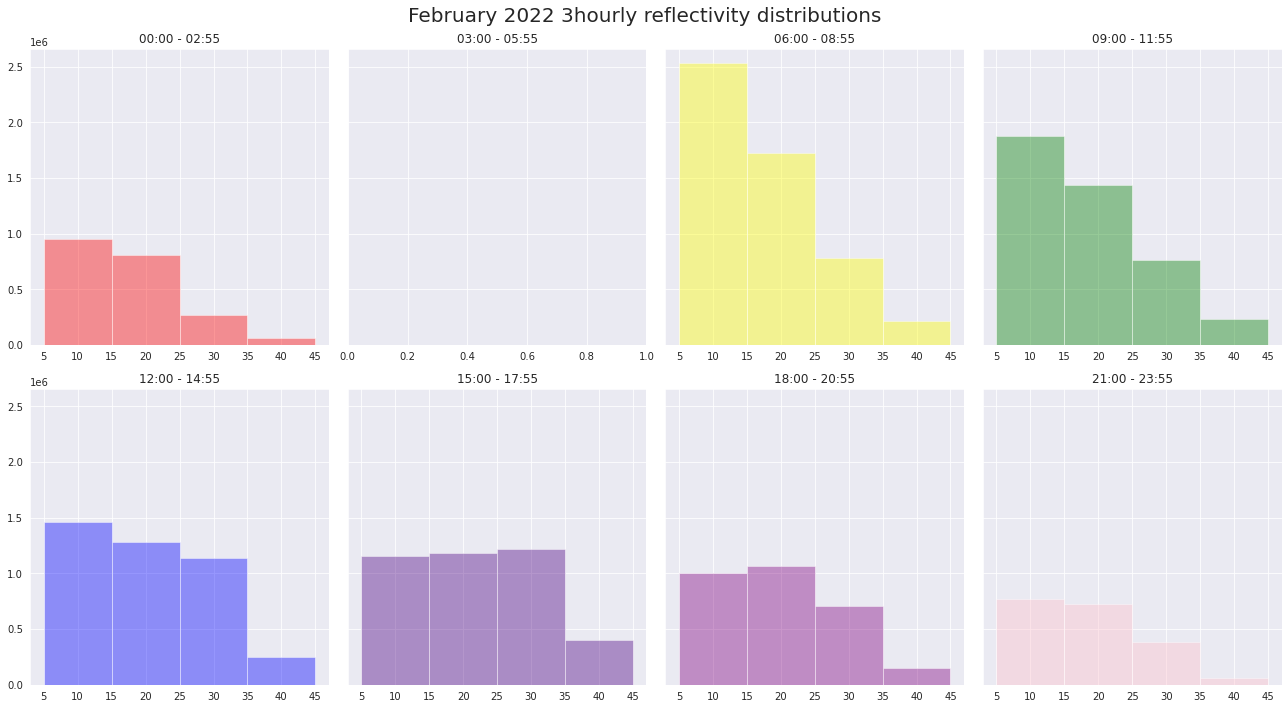

In [7]:
dir = "/g/data/rq0/level_2/73/REFLECTIVITY/73_"
time02_00 = []   
time02_03 = []    
time02_06 = []    
time02_09 = []    
time02_12 = []    
time02_15 = []    
time02_18 = []    
time02_21 = []    
for j in ["202202"]:
    files_T_202202 = glob.glob(dir+"*%s*"%(j))
    files_T_202202.sort
    ds_T = xr.open_mfdataset(files_T_202202, engine="netcdf4")
    for k in ["01","02","03","04","05","06","07","08","09","10",
              "11","12","13","14","15","16","17","18","19","20",
              "21","22","23","24","25","26","27","28"]:
        start00 = "2022-02-"+k+"T00:00:00.000000000"
        end00 = "2022-02-"+k+"T02:55:00.000000000"
        time_slice00 = slice(start00,end00)
        T0200 = ds_T["reflectivity"].sel(time=time_slice00)
        time02_00.append(T0200)
        
        start03 = "2022-02-"+k+"T03:00:00.000000000"
        end03 = "2022-02-"+k+"T05:55:00.000000000"
        time_slice03 = slice(start03,end03)
        T0203 = ds_T["reflectivity"].sel(time=time_slice03)
        time02_03.append(T0203)
        
        start06 = "2022-02-"+k+"T06:00:00.000000000"
        end06 = "2022-02-"+k+"T08:55:00.000000000"
        time_slice06 = slice(start06,end06)
        T0206 = ds_T["reflectivity"].sel(time=time_slice06)
        time02_06.append(T0206)
        
        start09 = "2022-02-"+k+"T09:00:00.000000000"
        end09 = "2022-02-"+k+"T11:55:00.000000000"
        time_slice09 = slice(start09,end09)
        T0209 = ds_T["reflectivity"].sel(time=time_slice09)
        time02_09.append(T0209)
        
        start12 = "2022-02-"+k+"T12:00:00.000000000"
        end12 = "2022-02-"+k+"T14:55:00.000000000"
        time_slice12 = slice(start12,end12)
        T0212 = ds_T["reflectivity"].sel(time=time_slice12)
        time02_12.append(T0212)
        
        start15 = "2022-02-"+k+"T15:00:00.000000000"
        end15 = "2022-02-"+k+"T17:55:00.000000000"
        time_slice15 = slice(start15,end15)
        T0215 = ds_T["reflectivity"].sel(time=time_slice15)
        time02_15.append(T0215)
        
        start18 = "2022-02-"+k+"T18:00:00.000000000"
        end18 = "2022-02-"+k+"T20:55:00.000000000"
        time_slice18 = slice(start18,end18)
        T0218 = ds_T["reflectivity"].sel(time=time_slice18)
        time02_18.append(T0218)
        
        start21 = "2022-02-"+k+"T21:00:00.000000000"
        end21 = "2022-02-"+k+"T23:55:00.000000000"
        time_slice21 = slice(start21,end21)
        T0221 = ds_T["reflectivity"].sel(time=time_slice21)
        time02_21.append(T0221)

fig, ax = plt.subplots(2, 4, figsize=(18,10),sharey=True, tight_layout=True)
sns.set_style("darkgrid")
bins = [5,15,25,35,45]
fig.figure.suptitle("February 2022 3hourly reflectivity distributions",fontsize=20) 
ax[0,0].set_title("00:00 - 02:55")
ax[0,1].set_title("03:00 - 05:55")
ax[0,2].set_title("06:00 - 08:55")
ax[0,3].set_title("09:00 - 11:55")
ax[1,0].set_title("12:00 - 14:55")
ax[1,1].set_title("15:00 - 17:55")
ax[1,2].set_title("18:00 - 20:55")
ax[1,3].set_title("21:00 - 23:55")
sns.distplot(time02_00,bins=bins,hist=True,kde=False,norm_hist=False,ax=ax[0,0],color="red");
#sns.distplot(time02_03,bins=bins,hist=True,kde=False,norm_hist=False,ax=ax[0,1],color="orange")
sns.distplot(time02_06,bins=bins,hist=True,kde=False,norm_hist=False,ax=ax[0,2],color="yellow")
sns.distplot(time02_09,bins=bins,hist=True,kde=False,norm_hist=False,ax=ax[0,3],color="green")
sns.distplot(time02_12,bins=bins,hist=True,kde=False,norm_hist=False,ax=ax[1,0],color="blue");
sns.distplot(time02_15,bins=bins,hist=True,kde=False,norm_hist=False,ax=ax[1,1],color="indigo")
sns.distplot(time02_18,bins=bins,hist=True,kde=False,norm_hist=False,ax=ax[1,2],color="purple")
sns.distplot(time02_21,bins=bins,hist=True,kde=False,norm_hist=False,ax=ax[1,3],color="pink");